### Imports

In [3]:
from keras_segmentation.models.unet import mobilenet_unet
from matplotlib import pyplot as plt
import tensorflow as tf
from imgaug import augmenters as iaa
import os
from PIL import Image
from glob import glob
import skimage.transform as st
import matplotlib.image as mpimg
from keras.callbacks import History

### Model Initialization

In [4]:
model = mobilenet_unet(n_classes=2 ,  input_height=512, input_width=512)

### Augmentation

In [6]:
def custom_augmentation():
    return  iaa.Sequential(
        [
            # apply the following augmenters to most images
            iaa.Fliplr(0.5),  # horizontally flip 50% of all images
            iaa.Flipud(0.5), # horizontally flip 50% of all images
            iaa.ScaleX((0.5, 1.5)),
            iaa.ScaleY((0.5, 1.5)),
            iaa.TranslateX(percent=(-0.1, 0.1)),
            iaa.TranslateY(percent=(-0.1, 0.1)),
            iaa.Rot90((1, 3)), 
            iaa.JpegCompression(compression=(70, 99)),
            iaa.MultiplyAndAddToBrightness(mul=(0.5, 1.5), add=(-30, 30)),
            # iaa.MotionBlur(k=5),
            iaa.Affine(scale=(0.5, 0.75))
        ])


### Model Training

In [7]:
history = History()

train = model.train(
    train_images = "dataset-segmentation/train-resized/",
    train_annotations = "dataset-segmentation/train-annotations/",
    validate=True,
    val_images="dataset-segmentation/validate-resized/",
    val_annotations="dataset-segmentation/validate-annotations/",
    checkpoints_path = "tmp/checkpoints/vgg_segnet_1", 
    epochs=10, 
    do_augment=True, # enable augmentation 
    custom_augmentation=custom_augmentation, # sets the augmention function to use
    callbacks = [history]
)

Verifying training dataset


100%|██████████| 760/760 [00:11<00:00, 65.23it/s] 


Dataset verified! 
Verifying validation dataset


100%|██████████| 95/95 [00:01<00:00, 58.97it/s]


Dataset verified! 
Epoch 1/10
512/512 [==============================] - 150s 245ms/step - loss: 0.0468 - accuracy: 0.9864 - val_loss: 0.2746 - val_accuracy: 0.9713
Epoch 2/10
512/512 [==============================] - 129s 252ms/step - loss: 0.0245 - accuracy: 0.9913 - val_loss: 0.0999 - val_accuracy: 0.9721
Epoch 3/10
512/512 [==============================] - 145s 284ms/step - loss: 0.0213 - accuracy: 0.9923 - val_loss: 0.1138 - val_accuracy: 0.9769
Epoch 4/10
512/512 [==============================] - 146s 286ms/step - loss: 0.0192 - accuracy: 0.9931 - val_loss: 0.1031 - val_accuracy: 0.9782
Epoch 5/10
512/512 [==============================] - 154s 301ms/step - loss: 0.0158 - accuracy: 0.9942 - val_loss: 0.1443 - val_accuracy: 0.9518
Epoch 6/10
512/512 [==============================] - 150s 293ms/step - loss: 0.0168 - accuracy: 0.9939 - val_loss: 0.1157 - val_accuracy: 0.9695
Epoch 7/10
512/512 [==============================] - 145s 283ms/step - loss: 0.0168 - accuracy: 0.9939 -

#### Model Accuracy and Loss Plots

In [8]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


(0.0, 1.01)

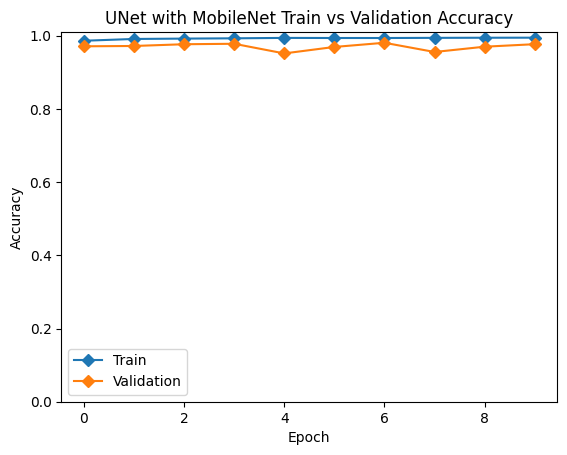

In [13]:

plt.plot(history.history['accuracy'], marker = 'D')
plt.plot(history.history['val_accuracy'], marker = 'D')
plt.legend(['Train', 'Validation'], loc='lower left')
plt.title('UNet with MobileNet Train vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(bottom=0)
plt.ylim(top=1.01)

(0.0, 1.01)

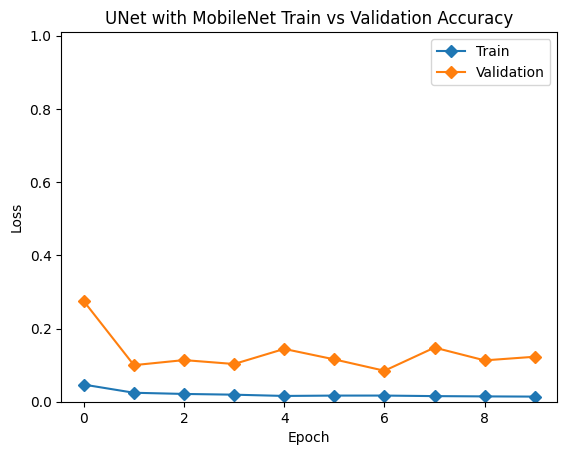

In [14]:
plt.plot(history.history['loss'], marker = 'D')
plt.plot(history.history['val_loss'], marker = 'D')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.title('UNet with MobileNet Train vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(bottom=0)
plt.ylim(top=1.01)

### Model Predictions Visualization

In [15]:
fn = model.predict_segmentation(
    inp="dataset-segmentation/test-images/06-22-23AMFC_4.jpg",
    out_fname = "dataset-segmentation/out/06-22-23AMFC_4.png", overlay_img = True, show_legends = True,
    class_names = ["background", "lettuce"]
)

n = model.predict_segmentation(
    inp="dataset-segmentation/test-images/06-21-23PM-N_26.jpg",
    out_fname = "dataset-segmentation/out/06-21-23PM-N_26.png", overlay_img = True, show_legends = True,
    class_names = ["background", "lettuce"]
)

p = model.predict_segmentation(
    inp="dataset-segmentation/test-images/06-23-23PMF-K_7.jpg",
    out_fname = "dataset-segmentation/out/06-23-23PMF-K_7.png", overlay_img = True, show_legends = True,
    class_names = ["background", "lettuce"]
)

k = model.predict_segmentation(
    inp="dataset-segmentation/test-images/06-26-23PM-K_22.jpg",
    out_fname = "dataset-segmentation/out/06-26-23PM-K_22.png", overlay_img = True, show_legends = True,
    class_names = ["background", "lettuce"]
)


1/1 [==============================] - 0s 84ms/step


#### Visualizations

**Resizing predicted masks**

In [16]:
fn = st.resize(fn, (3024, 3024))
n = st.resize(n, (3024, 3024))
p = st.resize(p, (3024,3024))
k = st.resize(k, (3024,3024))
preds = [n, fn, p, k]

**Loading files**

In [17]:
images = glob("dataset-segmentation/images/*.jpg")
masks = glob("dataset-segmentation/masks/*.png")
out = glob("dataset-segmentation/out/*.png")

images = [mpimg.imread(i) for i in images]
masks = [mpimg.imread(i) for i in masks]
out = [mpimg.imread(i) for i in out]

**Setting up the array**

In [18]:
arr = []
for i in range(4):
    arr.insert((i*4), images[i])
    arr.insert((i*4)+1, masks[i])
    arr.insert((i*4)+2, preds[i])
    arr.insert((i*4)+3, out[i])


**Plotting the results**

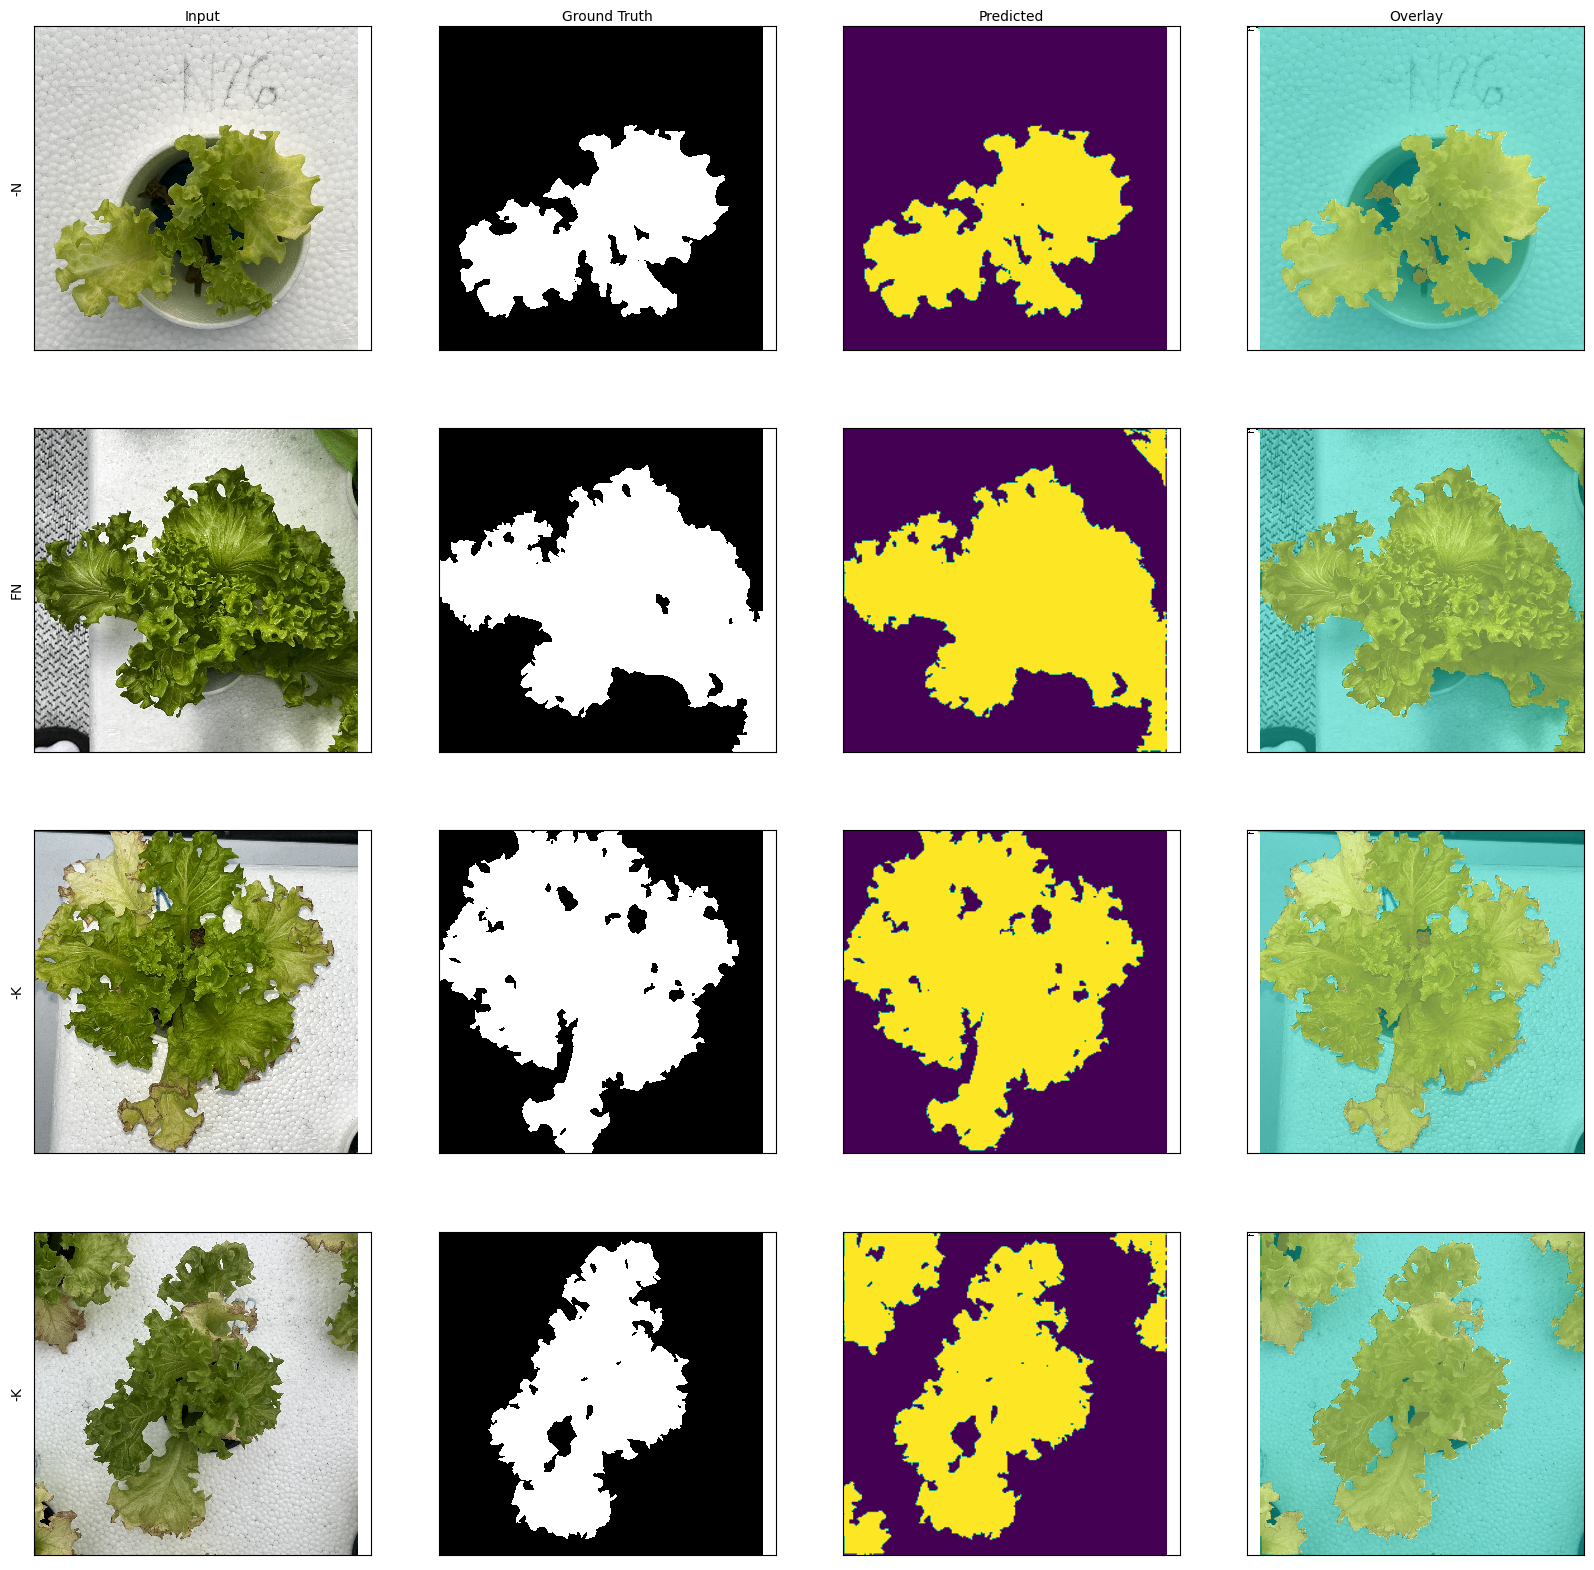

In [19]:
fig, axs = plt.subplots(nrows=4, ncols=4, sharex=True, sharey=True, figsize=(20, 20))
axs = axs.flatten()

y_labels=["-N", "FN", "-K", "-K"]
x_labels = ["Input", "Ground Truth", "Predicted", "Overlay"]

for i in range(len(arr)):
    axs[i].imshow(arr[i], interpolation='none')
    axs[i].set_xticks([])
    axs[i].set_yticks([])

    if i%4 == 0:
        axs[i].set_ylabel(y_labels[i//4])

    if i < 4:
        axs[i].set_xlabel(x_labels[i])
        axs[i].xaxis.set_label_position('top')

### Model Evaluation

In [20]:
print(model.evaluate_segmentation( inp_images_dir="dataset-segmentation/test-resized/"  , annotations_dir="dataset-segmentation/test-annotations/" ) )


0it [00:00, ?it/s]

1/1 [==============================] - 0s 435ms/step


1it [00:01,  1.30s/it]

1/1 [==============================] - 1s 621ms/step


2it [00:02,  1.07s/it]

1/1 [==============================] - 0s 188ms/step


3it [00:02,  1.17it/s]

1/1 [==============================] - 0s 181ms/step


4it [00:03,  1.29it/s]

1/1 [==============================] - 0s 260ms/step


5it [00:03,  1.47it/s]

1/1 [==============================] - 0s 43ms/step


6it [00:04,  1.97it/s]

1/1 [==============================] - 0s 25ms/step


7it [00:04,  2.58it/s]

1/1 [==============================] - 0s 23ms/step


8it [00:04,  3.28it/s]

1/1 [==============================] - 0s 34ms/step


9it [00:04,  3.88it/s]

1/1 [==============================] - 0s 47ms/step


10it [00:04,  3.77it/s]

1/1 [==============================] - 0s 23ms/step


11it [00:04,  4.62it/s]

1/1 [==============================] - 0s 26ms/step


12it [00:05,  5.43it/s]

1/1 [==============================] - 0s 23ms/step


13it [00:05,  6.02it/s]

1/1 [==============================] - 0s 41ms/step


14it [00:05,  4.81it/s]

1/1 [==============================] - 0s 26ms/step


15it [00:05,  5.57it/s]

1/1 [==============================] - 0s 22ms/step


16it [00:05,  6.29it/s]

1/1 [==============================] - 0s 25ms/step


17it [00:05,  6.94it/s]

1/1 [==============================] - 0s 21ms/step


18it [00:05,  7.48it/s]

1/1 [==============================] - 0s 21ms/step


19it [00:06,  7.81it/s]

1/1 [==============================] - 0s 21ms/step


20it [00:06,  8.29it/s]

1/1 [==============================] - 0s 20ms/step


21it [00:06,  8.72it/s]

1/1 [==============================] - 0s 22ms/step


22it [00:06,  8.90it/s]

1/1 [==============================] - 0s 88ms/step


23it [00:06,  6.87it/s]

1/1 [==============================] - 0s 60ms/step


24it [00:06,  5.85it/s]

1/1 [==============================] - 0s 23ms/step


25it [00:06,  6.55it/s]

1/1 [==============================] - 0s 54ms/step


26it [00:07,  6.47it/s]

1/1 [==============================] - 0s 24ms/step


27it [00:07,  6.12it/s]

1/1 [==============================] - 0s 21ms/step


28it [00:07,  6.78it/s]

1/1 [==============================] - 0s 26ms/step


29it [00:07,  7.17it/s]

1/1 [==============================] - 0s 66ms/step


30it [00:07,  5.55it/s]

1/1 [==============================] - 0s 39ms/step


31it [00:07,  5.40it/s]

1/1 [==============================] - 0s 137ms/step


32it [00:08,  4.05it/s]

1/1 [==============================] - 0s 207ms/step


33it [00:09,  2.70it/s]

1/1 [==============================] - 0s 189ms/step


34it [00:09,  2.40it/s]

1/1 [==============================] - 0s 125ms/step


35it [00:10,  2.32it/s]

1/1 [==============================] - 0s 134ms/step


36it [00:10,  2.13it/s]

1/1 [==============================] - 0s 114ms/step


37it [00:11,  1.96it/s]

1/1 [==============================] - 0s 83ms/step


38it [00:11,  2.04it/s]

1/1 [==============================] - 0s 82ms/step


39it [00:12,  2.07it/s]

1/1 [==============================] - 0s 83ms/step


40it [00:12,  2.20it/s]

1/1 [==============================] - 0s 119ms/step


41it [00:12,  2.24it/s]

1/1 [==============================] - 0s 93ms/step


42it [00:13,  2.40it/s]

1/1 [==============================] - 0s 88ms/step


43it [00:13,  2.53it/s]

1/1 [==============================] - 0s 84ms/step


44it [00:14,  2.47it/s]

1/1 [==============================] - 0s 102ms/step


45it [00:14,  2.53it/s]

1/1 [==============================] - 0s 96ms/step


46it [00:14,  2.62it/s]

1/1 [==============================] - 0s 92ms/step


47it [00:15,  2.55it/s]

1/1 [==============================] - 0s 89ms/step


48it [00:15,  2.48it/s]

1/1 [==============================] - 0s 108ms/step


49it [00:16,  2.46it/s]

1/1 [==============================] - 0s 90ms/step


50it [00:16,  2.44it/s]

1/1 [==============================] - 0s 84ms/step


51it [00:16,  2.41it/s]

1/1 [==============================] - 0s 83ms/step


52it [00:17,  2.37it/s]

1/1 [==============================] - 0s 87ms/step


53it [00:17,  2.33it/s]

1/1 [==============================] - 0s 74ms/step


54it [00:18,  2.33it/s]

1/1 [==============================] - 0s 99ms/step


55it [00:18,  2.49it/s]

1/1 [==============================] - 0s 122ms/step


56it [00:18,  2.47it/s]

1/1 [==============================] - 0s 136ms/step


57it [00:19,  2.16it/s]

1/1 [==============================] - 0s 105ms/step


58it [00:19,  2.20it/s]

1/1 [==============================] - 0s 119ms/step


59it [00:20,  2.17it/s]

1/1 [==============================] - 0s 104ms/step


60it [00:20,  2.21it/s]

1/1 [==============================] - 0s 73ms/step


61it [00:21,  2.41it/s]

1/1 [==============================] - 0s 96ms/step


62it [00:21,  2.43it/s]

1/1 [==============================] - 0s 113ms/step


63it [00:21,  2.44it/s]

1/1 [==============================] - 0s 115ms/step


64it [00:22,  2.48it/s]

1/1 [==============================] - 0s 83ms/step


65it [00:22,  2.55it/s]

1/1 [==============================] - 0s 90ms/step


66it [00:23,  2.68it/s]

1/1 [==============================] - 0s 74ms/step


67it [00:23,  2.73it/s]

1/1 [==============================] - 0s 93ms/step


68it [00:23,  2.51it/s]

1/1 [==============================] - 0s 137ms/step


69it [00:24,  2.27it/s]

1/1 [==============================] - 0s 97ms/step


70it [00:24,  2.20it/s]

1/1 [==============================] - 0s 76ms/step


71it [00:25,  2.20it/s]

1/1 [==============================] - 0s 87ms/step


72it [00:25,  2.34it/s]

1/1 [==============================] - 0s 105ms/step


73it [00:26,  2.44it/s]

1/1 [==============================] - 0s 70ms/step


74it [00:26,  2.59it/s]

1/1 [==============================] - 0s 87ms/step


75it [00:26,  2.64it/s]

1/1 [==============================] - 0s 101ms/step


76it [00:27,  2.60it/s]

1/1 [==============================] - 0s 68ms/step


77it [00:27,  2.48it/s]

1/1 [==============================] - 0s 70ms/step


78it [00:28,  2.47it/s]

1/1 [==============================] - 0s 75ms/step


79it [00:28,  2.68it/s]

1/1 [==============================] - 0s 116ms/step


80it [00:28,  2.66it/s]

1/1 [==============================] - 0s 88ms/step


81it [00:29,  2.72it/s]

1/1 [==============================] - 0s 67ms/step


82it [00:29,  2.81it/s]

1/1 [==============================] - 0s 102ms/step


83it [00:29,  2.81it/s]

1/1 [==============================] - 0s 98ms/step


84it [00:30,  2.60it/s]

1/1 [==============================] - 0s 86ms/step


85it [00:30,  2.50it/s]

1/1 [==============================] - 0s 76ms/step


86it [00:30,  2.64it/s]

1/1 [==============================] - 0s 106ms/step


87it [00:31,  2.52it/s]

1/1 [==============================] - 0s 153ms/step


88it [00:31,  2.41it/s]

1/1 [==============================] - 0s 92ms/step


89it [00:32,  2.45it/s]

1/1 [==============================] - 0s 96ms/step


90it [00:32,  2.47it/s]

1/1 [==============================] - 0s 87ms/step


91it [00:33,  2.49it/s]

1/1 [==============================] - 0s 100ms/step


92it [00:33,  2.44it/s]

1/1 [==============================] - 0s 104ms/step


93it [00:33,  2.32it/s]

1/1 [==============================] - 0s 152ms/step


94it [00:34,  2.08it/s]

1/1 [==============================] - 0s 232ms/step


95it [00:35,  2.69it/s]

{'frequency_weighted_IU': 0.9630101605440505, 'mean_IU': 0.9610548398522165, 'class_wise_IU': array([0.96944087, 0.95266881])}


### Save Model

In [21]:
model.save("mobilenetunet.h5")
# model.save("vggseg")

In [22]:
import tensorflow as tf 

model = tf.keras.models.load_model('mobilenetunet.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# convert.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

with open('mobilenetunet.tflite', 'wb') as f:
  f.write(tflite_model)